# Variation of parameters

**For second-order linear equations**

In [2]:
t = var('t')
palette = [(215/255, 0/255, 132/255), (255/255, 1/255, 73/255), (255/255, 121/255, 1/255), (255/255, 210/255, 0/255)]
cool_palette = [(0/255, 150/255, 173/255), (0/255, 200/255, 146/255)]

## Shock absorber rebound

### Homogeneous equation describing a shock absorber

A car seat is mounted on a shock absorber: a spring with lots of friction. You want to know $x(t)$, the position of the seat relative to the car at time $t$. When the car is moving steadily, the seat is described by the homogeneous equation

$$x''(t) + 3x'(t) + 2x(t).$$

The solutions are weighted sums of $\lambda_1(t) = e^{-t}$ and $\lambda_2(t) = e^{-2t}$. Whatever position and speed it starts with, the seat quickly approaches its equilibrium position, $0$.

### Inhomogeneous equation describing a quick stop

Suddenly, the car stops, with acceleration $-\frac{2}{e^t + e^{-t}}$, graphed as the light solid line below. Now the seat is described by the inhomogeneous equation

$$x''(t) + 3x'(t) + 2x(t) = \frac{2}{e^t + e^{-t}}.$$

Let's find a solution using variation of parameters recipe described in the book. (In Section 7.9, we'll learn why the recipe works.) Instead of working with $y$ and $y'$ directly, we'll work with the rescaled unknowns $X_1$ and $X_2$ defined by the equations

$$\begin{align*}
x & = \lambda_1 X_1 + \lambda_2 X_2 \\
x' & = \lambda_1' X_1 + \lambda_2' X_2.
\end{align*}$$

Set $W = Wr[\lambda_1, \lambda_2]$. The parallelogram area formula tells us that $W = \lambda_1 \lambda_2' - \lambda_1' \lambda_2$, so $W(t) = -e^{-3t}$. Now we can use the book's formulas for $X_1'$ and $X_2'$:

$$\begin{align*}
X_1'(t) & = -\frac{\lambda_2(t)}{W(t)}\,\frac{2}{e^t + e^{-t}} \\
X_2'(t) & = \hphantom{-}\frac{\lambda_1(t)}{W(t)}\,\frac{2}{e^t + e^{-t}}.
\end{align*}$$

Plugging in our formulas for $\lambda_1$, $\lambda_2$, and $W$, we get

$$\begin{align*}
X_1'(t) & = \hphantom{-}\frac{2e^{t}}{e^t + e^{-t}} \\
X_2'(t) & = -\frac{2e^{2t}}{e^t + e^{-t}}.
\end{align*}$$

Choosing the antiderivatives

$$\begin{align*}
X_1(t) & = \ln(1 + e^{2t}) \\
X_2(t) & = 2[\arctan(e^t) - e^t],
\end{align*}$$

we get the solution

$$x(t) = e^{-t} \ln(1 + e^{2t}) + 2e^{-2t}[\arctan(e^t) - e^t],$$

graphed as the dark solid line below.

The acceleration of the passenger is the acceleration of the car plus the relative acceleration of the seat:

$$-\frac{2}{e^t + e^{-t}} + x''(t).$$

It's graphed as the light dashed line below. The shock absorber was meant to reduce the acceleration of the passenger, compared to the acceleration of the car. Did it? If not, what went wrong?

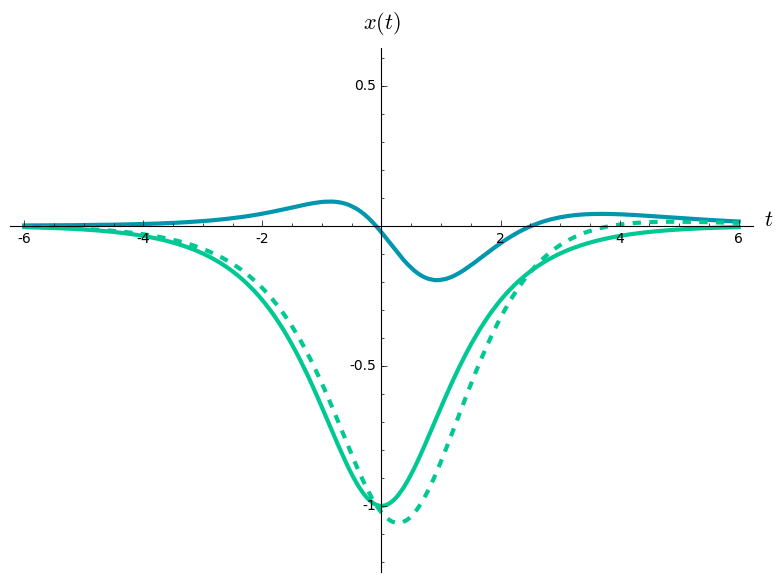

In [172]:
X1 = log(1 + exp(2*t))
X2 = 2*(arctan(exp(t)) - exp(t))
car_accel = -1/cosh(t)
seat_accel = diff(exp(-t)*X1 + exp(-2*t)*X2, t, t)
seat_labels = ['$t$', '$x(t)$']
plot([car_accel, seat_accel, car_accel + seat_accel], (t, -6, 6), ymin = -1.2, ymax = 0.6, thickness = 3, color = [cool_palette[1], cool_palette[0], cool_palette[1]], linestyle = ['solid', 'solid', 'dashed'], axes_labels = seat_labels)

### A quicker stop

Suppose the car stops faster, with acceleration $-\left(\frac{2}{e^t + e^{-t}}\right)^{20}$. The antiderivatives of $X_1'$ and $X_2'$ get tedious to calculate, but my laptop can can find formulas for them without a fuss. The acceleration of the car, the relative acceleration of the seat, and the acceleration of the passenger are graphed below. Did the shock absorber work as intended this time?

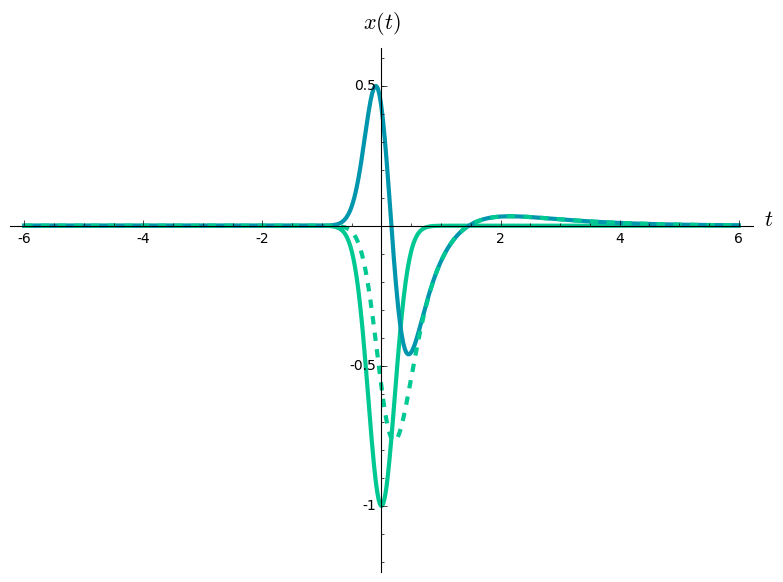

In [173]:
X1_fast = integrate(exp(t)/cosh(t)^20, t)
X2_fast = integrate(-exp(2*t)/cosh(t)^20, t)
car_accel_fast = -1/cosh(t)^20
seat_accel_fast = diff(exp(-t)*X1_fast + exp(-2*t)*X2_fast, t, t)
plot([car_accel_fast, seat_accel_fast, car_accel_fast + seat_accel_fast], (t, -6, 6), ymin = -1.2, ymax = 0.6, thickness = 3, color = [cool_palette[1], cool_palette[0], cool_palette[1]], linestyle = ['solid', 'solid', 'dashed'], axes_labels = seat_labels)

## Investment in a company

This example is based on the paper "Adjustment Costs in the Theory of Investment of the Firm," by J.P. Gould.

Let's say you're considering a long-term investment in a manufacturing company, which makes items at a constant cost and sells them at a constant price. Your discount rate at time $t$ is $\frac{1}{1+t}$, and the depreciation rate is $\tfrac{1}{10}$. If you use an investment strategy that maximizes the present value of the company's future profits, the company's capital stock $k(t)$ turns out to be described by the equation

$$k''(t) - \frac{1}{1+t} k'(t) - \left(\frac{1}{1+t} + \frac{1}{10}\right)\frac{1}{10} k(t) = -A.$$

The constant $A$ depends on the company's costs and revenues, and on the cost of adjusting the size of the company.

One of the paper's reviewers came up with a clever, economically inspired trick for solving the homogeneous version of the equation. I used it to find the solutions

$$\begin{align*}
\lambda_1(t) & = \left[\tfrac{1}{10}(1+t) - \tfrac{1}{2}\right]e^{t/10} \\
\lambda_2(t) & = e^{-t/10}.
\end{align*}$$

Let's take these as given, without worrying about where they came from.

The Wronskian $W = Wr[\lambda_1, \lambda_2]$ has the formula

$$W(t) = -\tfrac{1}{50}(1+t).$$

Now we can use the recipe from the book to find the rescaled unknowns $K_1$ and $K_2$ defined by the equations

$$\begin{align*}
k & = \lambda_1 K_1 + \lambda_2 K_2 \\
k' & = \lambda_1' K_1 + \lambda_2' K_2.
\end{align*}$$

According to the recipe,

$$\begin{align*}
K_1' & = -\tfrac{A}{200}\,\frac{e^{-t/10}}{1+t} \\
K_2' & = -\tfrac{A}{100}\left[\tfrac{1}{10}(1+t) - \tfrac{1}{2}\right] \frac{e^{t/10}}{1+t}.
\end{align*}$$

You can write the antiderivatives of these functions in terms of the "exponential integral" function $\operatorname{Ei}(u)$, whose derivative is $\tfrac{e^{u}}{u}$. Choosing the antiderivatives

$$\begin{align*}
K_1 & = -\tfrac{A}{200} e^{1/10} \operatorname{Ei}\left[-\tfrac{1}{10}(1+t)\right] \\
K_2 & = -\tfrac{A}{200} \left(e^{-1/10} \tfrac{1}{2} \operatorname{Ei}\left[\tfrac{1}{10}(1+t)\right] - e^{t/10}\right),
\end{align*}$$

we get the solution

$$k = -\tfrac{A}{200}\left( \left[\tfrac{1+t}{10} - \tfrac{1}{2}\right]e^{(1+t)/10} \operatorname{Ei}\left[-\tfrac{1+t}{10}\right] + e^{-(1+t)/10} \tfrac{1}{2} \operatorname{Ei}\left[\tfrac{1+t}{10}\right] - 1 \right).$$

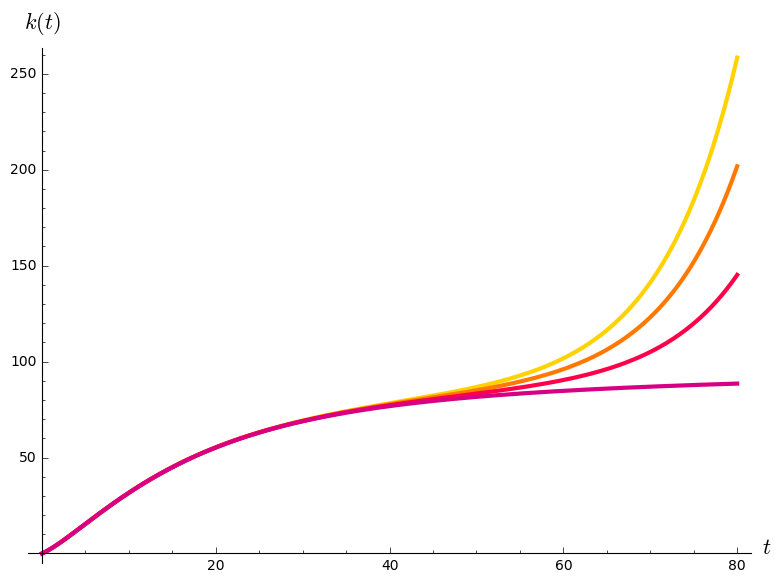

In [86]:
A = 1
b = 1/10
L1 = (b*(1+t) - 1/2)*exp(b*t)
L2 = exp(-b*t)
K1 = -A/(2*b^2) * exp(b) * Ei(-b*(1+t))
K2 = -A/(2*b^2) * exp(-b) * ((1/2)*Ei(b*(1+t)) - exp(b*(1+t)))
k = L1*K1 + L2*K2
k_base = k - k.subs(t==0)*L2
L_base = L1 - (b - 1/2)*L2
k_solutions = [plot(k_base + (m/400)*L_base, (t, 0, 80), thickness = 3, color = palette[m]) for m in range(4)]
invest_labels = ['$t$', '$k(t)$']
show(sum(reversed(k_solutions)), axes_labels = invest_labels)